# 6. Selección de Modelos

In [44]:
import numpy as np

## Dataset

Definimos datos de juguete:

In [45]:
X = np.array([[2, 2,4], [3, 4, 1], [1, 2, 4], [3, 4, 2], [3, 2, 2], [3, 1, 2], [1, 4, 2], [1, 1, 3]])
X

array([[2, 2, 4],
       [3, 4, 1],
       [1, 2, 4],
       [3, 4, 2],
       [3, 2, 2],
       [3, 1, 2],
       [1, 4, 2],
       [1, 1, 3]])

Con la siguientes etiquetas:

In [46]:
y = np.array(("a","a","a","a","a","b","b","b"))
y

array(['a', 'a', 'a', 'a', 'a', 'b', 'b', 'b'], dtype='<U1')

## Validación Cruzada

- [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)

### División K-Fold

Podemos usar [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) para hacer cross-validation:

In [48]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True, random_state=0)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    print(f"TRAIN: {train_index} VAL: {val_index} {y_val}")

    #model.fit(X_train, y_train)
    #model.predict(X_val)

TRAIN: [0 1 3 4 5 7] VAL: [2 6] ['a' 'b']
TRAIN: [0 2 3 4 5 6] VAL: [1 7] ['a' 'b']
TRAIN: [1 2 4 5 6 7] VAL: [0 3] ['a' 'a']
TRAIN: [0 1 2 3 6 7] VAL: [4 5] ['a' 'b']


### División K-Fold Estratificada

Para que la división sea estratificada, usamos [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html):

In [50]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    print(f"TRAIN: {train_index} VAL: {val_index} {y_val}")

    #model.fit(X_train, y_train)
    #model.predict(X_val)

TRAIN: [0 1 3 6 7] VAL: [2 4 5] ['a' 'a' 'b']
TRAIN: [1 2 4 5 7] VAL: [0 3 6] ['a' 'a' 'b']
TRAIN: [0 2 3 4 5 6] VAL: [1 7] ['a' 'b']


## Búsqueda en Grilla (Grid Search)

- [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)

### Grilla de Parámetros

In [51]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier??

In [52]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2],
}

Podemos listar todas las combinaciones para usarlas a mano con [ParameterGrid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html):

In [69]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
    print(params)
    model = DecisionTreeClassifier(**params, random_state=0)
    #model.fit(...)
    #model.predict(...)

{'criterion': 'gini', 'max_depth': 1}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'entropy', 'max_depth': 1}
{'criterion': 'entropy', 'max_depth': 2}


### Grilla de Parámetros + Validación Cruzada

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) nos sirve para hacer validación cruzada sobre una grilla de parámetros. Sklearn se encarga de todo el proceso y nos devuelve una tabla de resultados y el mejor clasificador obtenido.

La búsqueda se puede configurar de varias maneras. Por defecto la validación cruzada es estratificada.

- [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter9)

In [54]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
cv.fit(X, y);

In [56]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("crit.\tdepth\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['criterion']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

crit.	depth	| mean	std	rank
gini	1	| 0.67	0.27	3
gini	2	| 0.78	0.16	1
entropy	1	| 0.67	0.27	3
entropy	2	| 0.78	0.16	1


In [57]:
import pandas as pd
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']]
#df

,param_criterion,param_max_depth,mean_test_score,std_test_score,rank_test_score
0,gini,1,0.666667,0.272166,3
1,gini,2,0.777778,0.157135,1
2,entropy,1,0.666667,0.272166,3
3,entropy,2,0.777778,0.157135,1


In [58]:
best_model = cv.best_estimator_

In [59]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 2}

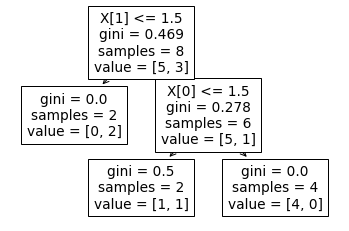

In [60]:
from sklearn.tree import plot_tree

plot_tree(best_model);

Podemos inspeccionar las clases:

In [61]:
best_model.classes_

array(['a', 'b'], dtype='<U1')

Podemos realizar una predicción con el mejor modelo encontrado:

In [62]:
best_model.predict([[1,1,2]])

array(['b'], dtype='<U1')

### Búsqueda Aleatoria

- [Randomized Parameter Optimization](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)

In [64]:
from sklearn.linear_model import SGDClassifier
SGDClassifier??

In [65]:
model = SGDClassifier(random_state=0)

In [72]:
from sklearn.utils.fixes import loguniform
from scipy import stats

param_dist = {
    'loss': [
        'hinge',        # SVM
        'log',          # logistic regression
        #'preceptron',  # perceptron (not supported)
    ],
    'alpha': loguniform(1e-4, 1e2),  # de 0.0001 a 100.0
}

Al parámetro alpha lo va a obtener desde muestras de una función de probabilidad tipo loguniform:

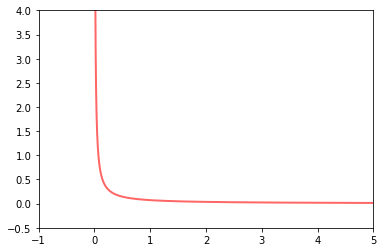

In [66]:
from scipy.stats import loguniform

import matplotlib.pyplot as plt
a= 1e-4
b=100
fig, ax = plt.subplots(1, 1)
x = np.linspace(a, b, 100000)
plt.xlim(-1, 5)
plt.ylim(-0.50,4)
ax.plot(x, loguniform.pdf(x, a, b), 'r-', lw=2, alpha=0.6, label='loguniform pdf')

Podemos muestrear mano con [ParameterSampler](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterSampler.html):

In [74]:
from sklearn.model_selection import ParameterSampler

for params in ParameterSampler(param_dist, 10, random_state=0):
    print(params)
    model = SGDClassifier(**params, random_state=0)
    #model.fit(...)
    #model.predict(...)

{'alpha': 0.196282248134428, 'loss': 'log'}
{'alpha': 11.630395714480306, 'loss': 'log'}
{'alpha': 0.18590843630169634, 'loss': 'log'}
{'alpha': 0.5512926225087423, 'loss': 'hinge'}
{'alpha': 0.042220489831498266, 'loss': 'hinge'}
{'alpha': 0.0002189161813274828, 'loss': 'hinge'}
{'alpha': 0.01998246739232945, 'loss': 'hinge'}
{'alpha': 7.46470024356059, 'loss': 'hinge'}
{'alpha': 0.256016152500287, 'loss': 'log'}
{'alpha': 10.386580256500283, 'loss': 'hinge'}


### Búsqueda Aleatoria + Validación Cruzada

También podemos dejar que Sklearn se encargue de todo con [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html):


In [75]:
from sklearn.model_selection import RandomizedSearchCV

model = SGDClassifier(random_state=0)

cv = RandomizedSearchCV(model, param_dist, n_iter=10, cv=3, random_state=0)
cv.fit(X, y);

In [76]:
import pandas as pd
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_loss', 'param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,mean_test_score,std_test_score,rank_test_score
0,log,0.196282,0.611111,0.078567,1
1,log,11.630396,0.611111,0.078567,1
2,log,0.185908,0.611111,0.078567,1
3,hinge,0.551293,0.611111,0.078567,1
4,hinge,0.04222,0.611111,0.078567,1
5,hinge,0.000219,0.611111,0.078567,1
6,hinge,0.019982,0.611111,0.078567,1
7,hinge,7.4647,0.611111,0.078567,1
8,log,0.256016,0.611111,0.078567,1
9,hinge,10.38658,0.611111,0.078567,1


In [77]:
cv.best_estimator_

SGDClassifier(alpha=0.196282248134428, loss='log', random_state=0)

In [78]:
cv.best_params_

{'alpha': 0.196282248134428, 'loss': 'log'}

## Referencias


Scikit-learn:

- [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)